In [1]:
class my_NaiveBayes():
    def __init__(self, distr='Gaussian'):
        self.class_number = 0
        self.argwhere_matrix = []
        self.class_len = []
        self.meanvar_matrix = []
        self.prob_vector = []
        pass
    
    def get_stats(self, x):
        self.mean = np.mean(x, axis = 0)
        self.variance = np.var(x, axis = 0)
        return self.mean, self.variance

    def pdf(self, x, mean, variance):
        return 1/np.sqrt(2 * np.pi * variance**2) * np.exp(-(x - mean)**2/(2 * variance**2))
    
    def fit(self, x, y):
        self.class_number = np.unique(y)
        self.len = len(x)
        
        for i in self.class_number:
            self.argwhere_matrix.append(np.reshape(np.argwhere(y == i), -1))
            self.class_len.append(len(np.argwhere(y == i))/len(y))
            self.meanvar_matrix.append(np.c_[self.get_stats(x[self.argwhere_matrix[i]])])
        pass
    
    def predict_prob(self, x):
        self.prob_vector = []

        for i in range(len(self.meanvar_matrix)):
            self.meanvar_vector = self.meanvar_matrix[i].T
            self.prob_vector.append(np.prod(self.pdf(x, self.meanvar_vector[0], self.meanvar_vector[1])) * self.class_len[i]) 
        return self.prob_vector 
    
    def predict(self, x, weighted=None):
        self.y_pred = []
        for i in range(len(x)):
            self.y_pred.append(np.argmax(self.predict_prob(x[i])))
        return np.array(self.y_pred)

    def score(self, x, y):
        self.y_pred = self.predict(x, weighted=None)
        self.acc = len(np.argwhere((self.y_pred - np.array(y)) == 0))/len(y)
        return self.acc
    
    def plot(self, x, y):
        if X.shape[1] == 2:
            for j in np.unique(y):
                plt.scatter(x[y == j, 0], x[y == j, 1])
                plt.xlabel('feature 1')
                plt.ylabel('feature 2')
            plt.show()
        else:
            print("We have only one OR more than two features. 2D plotting is not possible.")
        pass

In [2]:
# lets test in on the iris dataset
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

my_nb = my_NaiveBayes()
my_model = my_nb.fit(X_train, y_train)
predictions = my_nb.predict(X_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [3]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [4]:
#scores
my_nb = my_NaiveBayes()
my_model = my_nb.fit(X_train, y_train)
predictions = my_nb.predict(X_test)

print("my score on the train data:", my_nb.score(X_train, y_train))
print("my score on the test data:", my_nb.score(X_test, y_test))

my_NaiveBayes().plot(X_train, y_train)

my score on the train data: 0.9285714285714286
my score on the test data: 0.9473684210526315
We have only one OR more than two features. 2D plotting is not possible.


In [5]:
# take the synthetic data with 2-feature 4 classes
class0_len = 1000
X0 = np.random.normal(0, 1, (class0_len, 2))
y0 = [0]*class0_len

class1_len = 2000
X1 = np.random.normal(1, 1, (class1_len, 2))
y1 = [1]*class1_len

class2_len = 1500
X2 = np.random.normal(-2, 1, (class2_len, 2))
y2 = [2]*class2_len

class3_len = 500
X3 = np.random.normal(4, 2, (class3_len, 2))
y3 = [3]*class3_len

X = np.concatenate((X0, X1, X2, X3))
y = y0+y1+y2+y3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [6]:
#scores
my_nb = my_NaiveBayes()
my_model = my_nb.fit(X_train, y_train)
predictions = my_nb.predict(X_test)

print("my score on the train data:", my_nb.score(X_train, y_train))
print("my score on the test data:", my_nb.score(X_test, y_test))

# compare with sklearn's one
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("sklearn's score on the train data:", gnb.score(X_train, y_train))
print("sklearn's score on the test data:", gnb.score(X_test, y_test))

my score on the train data: 0.8144
my score on the test data: 0.804
sklearn's score on the train data: 0.8154666666666667
sklearn's score on the test data: 0.8056


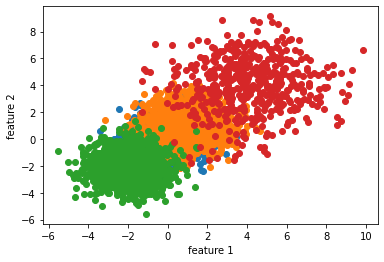

In [7]:
my_NaiveBayes().plot(X, y)

In [36]:
class my_NaiveBayes():
    def __init__(self, distr='exponential'):
        self.class_number = 0
        self.argwhere_matrix = []
        self.class_len = []
        self.meanvar_matrix = []
        self.prob_vector = []
        pass
    
    def get_stats(self, x):
        self.mean = 1/np.mean(x, axis = 0)
        return self.mean

    def pdf(self, x, mean):
        return mean * np.exp(- mean * x)
    
    def fit(self, x, y):
        self.class_number = np.unique(y)
        self.len = len(x)

        for i in self.class_number:
            self.argwhere_matrix.append(np.reshape(np.argwhere(y == i), -1))
            self.class_len.append(len(np.argwhere(y == i))/len(y))
            self.meanvar_matrix.append(self.get_stats(x[self.argwhere_matrix[i]]))
        pass
    
    def predict_prob(self, x):
        self.prob_vector = []
        for i in range(len(self.meanvar_matrix)):
            self.meanvar_vector = self.meanvar_matrix[i].T
            self.prob_vector.append(np.sum(np.log(self.pdf(x, self.meanvar_vector[0]) * self.class_len[i])))
        return self.prob_vector 
    
    def predict(self, x, weighted=None):
        self.y_pred = []
        for i in range(len(x)):
            self.y_pred.append(np.argmax(self.predict_prob(x[i])))
        return np.array(self.y_pred)

    def score(self, x, y):
        self.y_pred = self.predict(x, weighted=None)
        self.acc = len(np.argwhere((self.y_pred - np.array(y)) == 0))/len(y)
        return self.acc
    
    def plot(self, x, y):
        if X.shape[1] == 2:
            for j in np.unique(y):
                plt.scatter(x[y == j, 0], x[y == j, 1])
                plt.xlabel('feature 1')
                plt.ylabel('feature 2')
            plt.show()
        else:
            print("We have only one OR more than two features. 2D plotting is not possible.")
        pass

In [42]:
# lets test in on the iris dataset
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# take the synthetic data with 3-feature 2 classes
class0_len = 1000
X0 = np.random.normal(0, 1, (class0_len, 3))
y0 = [0]*class0_len

class1_len = 2000
X1 = np.random.normal(1, 1, (class1_len, 3))
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [43]:
my_nb = my_NaiveBayes()
my_model = my_nb.fit(X_train, y_train)
predictions = my_nb.predict(X_test)
predictions

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [44]:
#scores
my_nb = my_NaiveBayes()
my_model = my_nb.fit(X_train, y_train)
predictions = my_nb.predict(X_test)

print("my score on the train data:", my_nb.score(X_train, y_train))
print("my score on the test data:", my_nb.score(X_test, y_test))

# compare with sklearn's one
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("sklearn's score on the train data:", gnb.score(X_train, y_train))
print("sklearn's score on the test data:", gnb.score(X_test, y_test))

my score on the train data: 0.8213333333333334
my score on the test data: 0.8013333333333333
sklearn's score on the train data: 0.8328888888888889
sklearn's score on the test data: 0.82
